In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('IMT_Hyderabad_Dataset.xls')

In [3]:
df.head(2)

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,Latest Updates,App_Version,Android_Supported
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Application        10840 non-null  object 
 1   Ratings            9367 non-null   float64
 2   Reviews            10841 non-null  object 
 3   File_Size          10841 non-null  object 
 4   Downloads          10841 non-null  object 
 5   Category           10840 non-null  object 
 6   Purchase_Price     10841 non-null  object 
 7   Content Rating     10840 non-null  object 
 8   Genres             10841 non-null  object 
 9   Latest Updates     10841 non-null  object 
 10  App_Version        10833 non-null  object 
 11  Android_Supported  10838 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1016.5+ KB


In [5]:
df.drop_duplicates(subset ="Application", 
                     keep = False, inplace = True) 

In [6]:
df.drop(10472,axis=0,inplace=True)

In [7]:
df['Purchase_Price'].unique()

array([0, '$3.99', '$1.49', '$2.99', '$7.99', '$4.99', '$3.49', '$1.99',
       '$5.99', '$6.99', '$9.99', '$7.49', '$0.99', '$1.00', '$2.49',
       '$10.99', '$1.50', '$14.99', '$15.99', '$74.99', '$39.99',
       '$29.99', '$4.49', '$1.70', '$8.99', '$2.00', '$3.88', '$25.99',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$19.99', '$1.59', '$6.49', '$1.29', '$5.00',
       '$13.99', '$299.99', '$379.99', '$37.99', '$18.99', '$389.99',
       '$19.90', '$8.49', '$1.75', '$11.99', '$14.00', '$4.85', '$46.99',
       '$5.49', '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$1.96',
       '$19.40', '$3.90', '$4.59', '$15.46', '$10.00', '$3.04', '$12.99',
       '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95', '$2.90',
       '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$16.99', '$1.20', '$1.04'], dtype=object)

In [8]:
df['Downloads'] = df['Downloads'].astype('str')
df['Downloads'] = df['Downloads'].apply(lambda x : x.replace('+',''))
df['Downloads'] = df['Downloads'].apply(lambda x : x.replace (',',''))
df['Downloads'] = df['Downloads'].astype('int64')

In [9]:
df['Reviews'] = df['Reviews'].astype('int64')

In [10]:
df['Purchase_Price'] = df['Purchase_Price'].astype('str')
df['Purchase_Price'] = df['Purchase_Price'].apply(lambda x : x.replace('$',''))
df['Purchase_Price'] = df['Purchase_Price'].astype('float64')

In [11]:
df['Latest Updates'] = pd.to_datetime(df['Latest Updates'].values)

In [12]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [13]:
df1 = df['File_Size'].copy()

In [14]:
df2 = df1[df1.str.contains('M')]

In [15]:
df2 = df2.apply(lambda x : x.replace('M',''))

In [16]:
df3 = df1[df1.str.contains('k')]

In [17]:
df3

58        201k
209        23k
450       118k
458       695k
479        18k
         ...  
10763     552k
10764     885k
10798    1020k
10832     582k
10833     619k
Name: File_Size, Length: 312, dtype: object

In [18]:
df3 = df3.apply(lambda x : x.replace('k',''))

In [19]:
df3 = df3.astype('float64')

In [20]:
df5 = df3.div(1000).round(1)

In [21]:
df2 = df2.astype('float64')

In [22]:
df3 = df3.astype('float64')

In [23]:
df4 = df1[df1.str.contains('Varies with device')]
df4 = df4.apply(lambda x : x.replace('Varies with device','NaN'))

In [24]:
df4 = df4.astype('float64')

In [25]:
df6 = df2.append(df5)

In [26]:
df6

0        19.0
2         8.7
3        25.0
4         2.8
5         5.6
         ... 
10763     0.6
10764     0.9
10798     1.0
10832     0.6
10833     0.6
Name: File_Size, Length: 7925, dtype: float64

In [27]:
df.rename(columns={"File_Size": "File"}, inplace = True)

In [28]:
new = pd.concat([df, df6], axis = 1)

In [29]:
new.head(2)

,Application,Ratings,Reviews,File,Downloads,Category,Purchase_Price,Content Rating,Genres,Latest Updates,App_Version,Android_Supported,File_Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7


In [30]:
del new['File']

In [31]:
new.head(2)

,Application,Ratings,Reviews,Downloads,Category,Purchase_Price,Content Rating,Genres,Latest Updates,App_Version,Android_Supported,File_Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7


In [32]:
new = new[['Application', 'Ratings', 'Reviews', 'File_Size', 'Downloads', 'Category', 'Purchase_Price', 'Content Rating', 'Genres', 'Latest Updates', 'App_Version', 'Android_Supported']]

In [33]:
new.head(2)

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,Latest Updates,App_Version,Android_Supported
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up


In [34]:
new["File_Size"].fillna(new.File_Size.mean(),inplace=True)

In [35]:
new

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,Latest Updates,App_Version,Android_Supported
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,4.4,167,5.600000,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,38,53.000000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,3.600000,100,Free,0.0,Everyone,Education,2018-07-06,1,4.1 and up
10838,Parkinson Exercices FR,NaN,3,9.500000,1000,Free,0.0,Everyone,Medical,2017-01-20,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,4.5,114,19.706246,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [36]:
df = new.round({"File_Size":1})

In [37]:
del df['Latest Updates']
del df['Android_Supported']

In [38]:
df.head()

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,Genres,App_Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1
5,Paper flowers instructions,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,1


In [39]:
df["Ratings"].fillna(df.Ratings.mean(),inplace=True)

In [40]:
df = df.round({"Ratings":1})

In [41]:
df['Category'].value_counts()

Free    8146
Paid     714
Name: Category, dtype: int64

In [42]:
df['Category'].astype('str')

0        Free
2        Free
3        Free
4        Free
5        Free
         ... 
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: Category, Length: 8861, dtype: object

In [43]:
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8861 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Application     8860 non-null   object 
 1   Ratings         8861 non-null   float64
 2   Reviews         8861 non-null   int64  
 3   File_Size       8861 non-null   float64
 4   Downloads       8861 non-null   int64  
 5   Category        8861 non-null   object 
 6   Purchase_Price  8861 non-null   float64
 7   Content Rating  8861 non-null   object 
 8   Genres          8861 non-null   object 
 9   App_Version     8853 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 761.5+ KB


In [45]:
df1 = df["Genres"].str.split(";", n = 1, expand = True)

In [46]:
df1

,0,1
0,Art & Design,None
2,Art & Design,None
3,Art & Design,None
4,Art & Design,Creativity
5,Art & Design,None
...,...,...
10836,Education,None
10837,Education,None
10838,Medical,None
10839,Books & Reference,None


In [47]:
df1.columns = ['G1', 'G2']

In [48]:
df = pd.concat([df, df1], axis = 1)

In [49]:
del df['Genres']

In [50]:
df = df[['Application', 'Ratings', 'Reviews', 'File_Size', 'Downloads', 'Category', 'Purchase_Price', 'Content Rating', 'G1', 'G2', 'App_Version']]

In [51]:
df

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,G1,G2,App_Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,None,1.0.0
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,None,1.2.4
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,None,Varies with device
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,Creativity,1.1
5,Paper flowers instructions,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,None,1
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,38,53.0,5000,Free,0.0,Everyone,Education,None,1.48
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,3.6,100,Free,0.0,Everyone,Education,None,1
10838,Parkinson Exercices FR,4.2,3,9.5,1000,Free,0.0,Everyone,Medical,None,1
10839,The SCP Foundation DB fr nn5n,4.5,114,19.7,1000,Free,0.0,Mature 17+,Books & Reference,None,Varies with device


In [52]:
df['Reviews'].corr(df['Downloads'])

0.5240325476269999

In [53]:
df['Ratings'].corr(df['Downloads'])

0.035880131830169325

In [54]:
df['File_Size'].corr(df['Ratings'])

0.042499357259463126

In [55]:
df['App_Version'] = df['App_Version'].astype(str).str[0]

In [56]:
df['App_Version'].value_counts()

1    4282
2    1373
V     819
3     803
4     482
5     316
6     196
0     161
7     133
8     111
v      48
9      47
A      16
C      10
n      10
F       6
R       5
B       5
P       4
a       4
p       3
T       3
H       3
c       2
G       2
M       2
I       2
D       2
f       1
r       1
S       1
i       1
Y       1
K       1
N       1
e       1
d       1
o       1
Z       1
Name: App_Version, dtype: int64

In [57]:
df['App_Version'].replace(dict.fromkeys(['V','v','A','n','C','F','R','B','P','a','T','H','p','c','D','I','M','G','i','o','d','N','r','f','e','K','Z','S','Y'], '0'), inplace = True)

In [58]:
df['App_Version'].value_counts()

1    4282
2    1373
0    1118
3     803
4     482
5     316
6     196
7     133
8     111
9      47
Name: App_Version, dtype: int64

In [59]:
df['App_Version'].astype('int64')

0        1
2        1
3        0
4        1
5        1
        ..
10836    1
10837    1
10838    1
10839    0
10840    0
Name: App_Version, Length: 8861, dtype: int64

In [60]:
df['App_Version'] = df['App_Version'].apply(lambda x : x.replace('0','1'))

In [61]:
df['App_Version'].value_counts()

1    5400
2    1373
3     803
4     482
5     316
6     196
7     133
8     111
9      47
Name: App_Version, dtype: int64

In [62]:
df

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,G1,G2,App_Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,None,1
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,None,1
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,None,1
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,Creativity,1
5,Paper flowers instructions,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,None,1
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,38,53.0,5000,Free,0.0,Everyone,Education,None,1
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,3.6,100,Free,0.0,Everyone,Education,None,1
10838,Parkinson Exercices FR,4.2,3,9.5,1000,Free,0.0,Everyone,Medical,None,1
10839,The SCP Foundation DB fr nn5n,4.5,114,19.7,1000,Free,0.0,Mature 17+,Books & Reference,None,1


In [63]:
df1 = df.copy().drop(columns = ['Application', 'Category', 'Content Rating', 'G1', 'G2']) 

In [64]:
df1.head()

,Ratings,Reviews,File_Size,Downloads,Purchase_Price,App_Version
0,4.1,159,19.0,10000,0.0,1
2,4.7,87510,8.7,5000000,0.0,1
3,4.5,215644,25.0,50000000,0.0,1
4,4.3,967,2.8,100000,0.0,1
5,4.4,167,5.6,50000,0.0,1


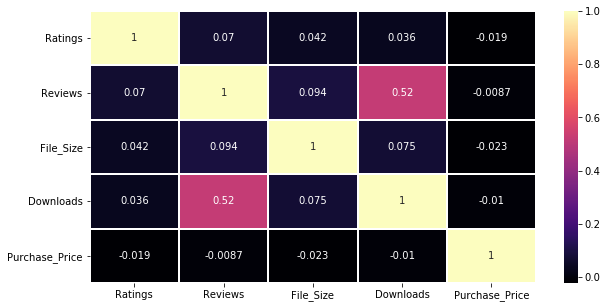

In [65]:
plt.figure(figsize = (10,5))
sns.heatmap(df1.corr(),cmap = 'magma', linecolor = 'white', linewidths = 1, annot = True)

Text(0.5, 1.0, 'Ratings of Paid Apps Grouped by Genres')

<Figure size 864x432 with 0 Axes>

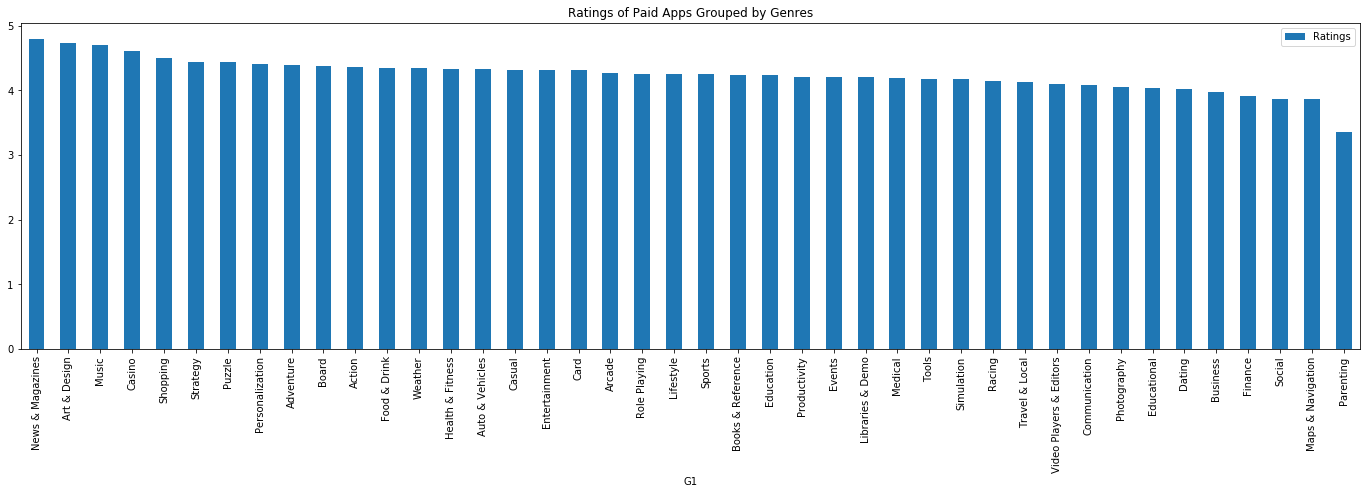

In [66]:
plt.figure(figsize=(12,6))
pd.DataFrame(df[df['Category'] == 'Paid'].groupby(['G1']).mean()['Ratings'] ).sort_values(['Ratings'],ascending = False).plot.bar(figsize=(24,6))   
plt.title('Ratings of Paid Apps Grouped by Genres')

Text(0.5, 1.0, 'Ratings of Free Apps Grouped by Genres')

<Figure size 864x432 with 0 Axes>

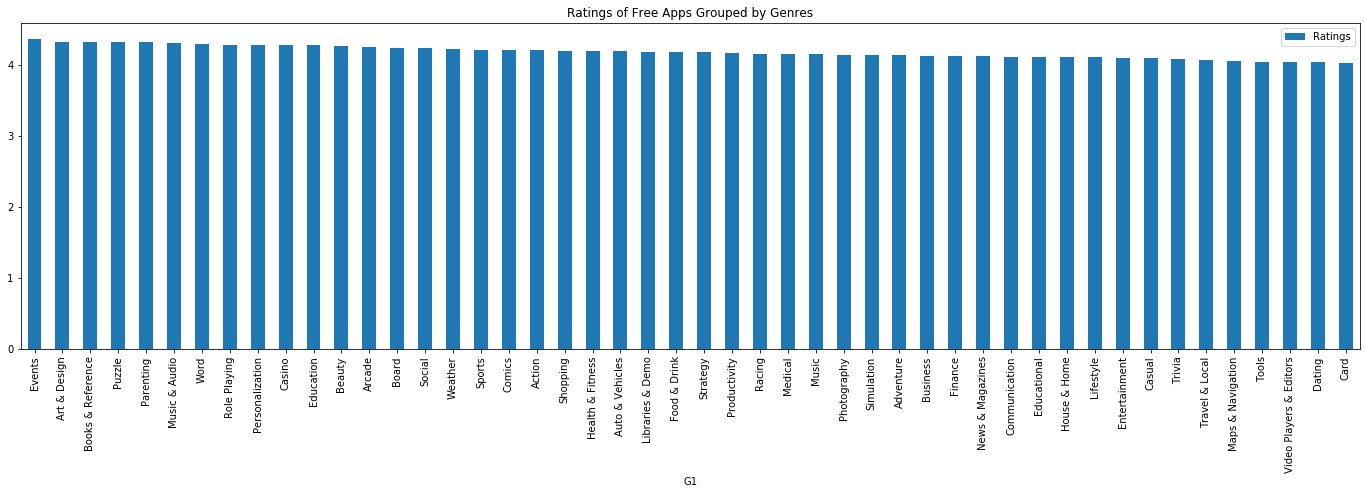

In [67]:
plt.figure(figsize=(12,6))
pd.DataFrame(df[df['Category'] == 'Free'].groupby(['G1']).mean()['Ratings'] ).sort_values(['Ratings'],ascending = False).plot.bar(figsize=(24,6))   
plt.title('Ratings of Free Apps Grouped by Genres')

In [68]:
df1.describe()

,Ratings,Reviews,File_Size,Downloads,Purchase_Price
count,8861.000000,8.861000e+03,8861.000000,8.861000e+03,8861.000000
mean,4.166132,9.940016e+04,19.705586,3.514148e+06,1.142938
std,0.505653,7.351628e+05,20.239355,2.173066e+07,17.551078
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,1.900000e+01,4.900000,1.000000e+03,0.000000
50%,4.200000,5.960000e+02,14.000000,5.000000e+04,0.000000
75%,4.500000,1.828000e+04,25.000000,1.000000e+06,0.000000
max,5.000000,4.291653e+07,100.000000,1.000000e+09,400.000000


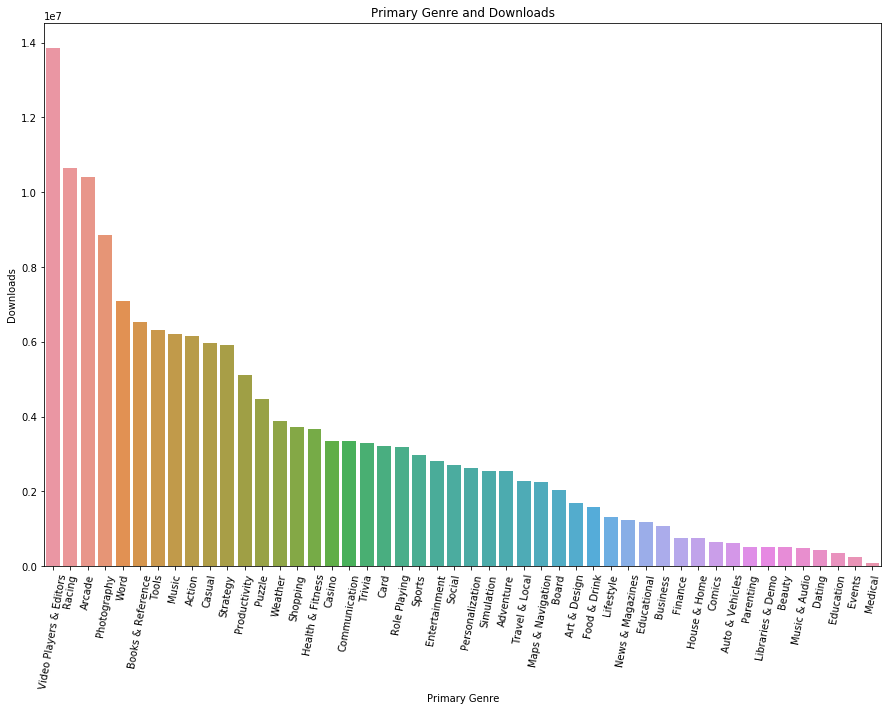

In [69]:
glist = list(df['G1'].unique())
Gdownloads = []
for i in glist:
    x = df[df['G1'] == i]
    if(len(x)!=0):
        Download = sum(x.Downloads)/len(x)
        Gdownloads.append(Download)
    else:
        Download = sum(x.Downloads)
        Gdownloads.append(Download)
        
#sorting
data_G_download = pd.DataFrame({'G1': glist,'Download':Gdownloads})
new_index = (data_G_download['Download'].sort_values(ascending=False)).index.values
sorted_data =data_G_download.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['G1'], y=sorted_data['Download'])
plt.xticks(rotation=80)
plt.xlabel("Primary Genre")
plt.ylabel("Downloads")
plt.title("Primary Genre and Downloads")
plt.show()

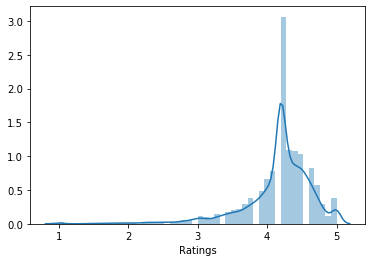

In [70]:
sns.distplot(df['Ratings'])

In [71]:
paid = df[df['Category'] == 'Paid']

Text(0.5, 1.0, '% Distribution of Paid Apps Genres')

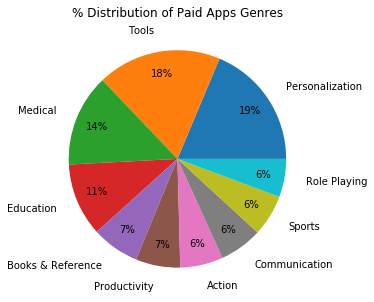

In [72]:
data = paid['G1'].value_counts()
data = data.reset_index()
data = data[:10]
plt.figure(figsize=(10,5))
plt.pie(x = list(data['G1']), labels=list(data['index']), autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title('% Distribution of Paid Apps Genres')

In [73]:
df['Ratings'].mode()

0    4.2
dtype: float64

In [74]:
df.groupby('G1').mean().sort_values(['Ratings'], ascending=False)

,Ratings,Reviews,File_Size,Downloads,Purchase_Price
G1,,,,,
Events,4.365625,2515.906250,14.590625,2.495806e+05,1.718594
Art & Design,4.345902,18312.426230,12.481967,1.700625e+06,0.097869
Puzzle,4.335938,93110.210938,34.490625,4.480366e+06,0.406641
Books & Reference,4.306481,53174.064815,14.006944,6.530003e+06,0.586806
Personalization,4.301928,85203.308540,11.526722,2.615688e+06,0.404959
Music & Audio,4.300000,1369.000000,9.800000,5.000000e+05,0.000000
Word,4.295238,222610.619048,28.209524,7.103455e+06,0.000000
Parenting,4.283333,15972.183333,22.231667,5.253518e+05,0.159667
Casino,4.282051,130871.051282,29.697436,3.340018e+06,0.358974


In [75]:
df.groupby('G1').mean().sort_values(['Downloads'], ascending=False)

,Ratings,Reviews,File_Size,Downloads,Purchase_Price
G1,,,,,
Video Players & Editors,4.041558,201969.201299,16.368831,1.384352e+07,0.067922
Racing,4.153535,351431.757576,44.332323,1.064149e+07,0.110707
Arcade,4.253889,301935.194444,34.628889,1.041855e+07,0.293222
Photography,4.132787,204781.319672,15.639344,8.852654e+06,0.444016
Word,4.295238,222610.619048,28.209524,7.103455e+06,0.000000
Books & Reference,4.306481,53174.064815,14.006944,6.530003e+06,0.586806
Tools,4.054791,230300.211302,9.976536,6.328958e+06,0.328317
Music,4.204762,160554.952381,39.580952,6.201024e+06,0.189524
Action,4.224643,282451.478571,46.180000,6.157356e+06,0.329393


In [76]:
df.groupby('Category').mean()

,Ratings,Reviews,File_Size,Downloads,Purchase_Price
Category,,,,,
Free,4.159335,107631.864367,19.782239,3.816858e+06,0.000000
Paid,4.243697,5473.401961,18.830952,6.011580e+04,14.184272


In [77]:
df.groupby('Content Rating').mean()

,Ratings,Reviews,File_Size,Downloads,Purchase_Price
Content Rating,,,,,
Adults only 18+,4.300000,27116.000000,21.866667,6.666667e+05,0.000000
Everyone,4.159408,85312.968094,17.734660,3.073583e+06,1.262945
Everyone 10+,4.207885,183261.336918,35.003943,5.102730e+06,0.439821
Mature 17+,4.134810,128632.990506,25.200633,2.945514e+06,0.272595
Teen,4.217044,176093.880259,28.847033,6.732158e+06,0.707961
Unrated,4.150000,593.500000,4.450000,2.525000e+04,0.000000


In [78]:
df.sort_values(['Downloads'], ascending=False)

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,G1,G2,App_Version
3687,Google Play Movies & TV,3.7,906384,19.7,1000000000,Free,0.00,Teen,Video Players & Editors,None,1
152,Google Play Books,3.9,1433233,19.7,1000000000,Free,0.00,Teen,Books & Reference,None,1
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",4.7,24900999,19.7,500000000,Free,0.00,Everyone,Tools,None,4
5596,Samsung Health,4.3,480208,70.0,500000000,Free,0.00,Everyone,Health & Fitness,None,5
4005,Clean Master- Space Cleaner & Antivirus,4.7,42916526,19.7,500000000,Free,0.00,Everyone,Tools,None,1
...,...,...,...,...,...,...,...,...,...,...,...
9337,EG | Explore Folegandros,4.2,0,56.0,0,Paid,3.99,Everyone,Travel & Local,None,1
5307,Ak Parti YardÄ±m Toplama,4.2,0,8.7,0,Paid,13.99,Teen,Social,None,3
8081,CX Network,4.2,0,10.0,0,Free,0.00,Everyone,Business,None,1
9917,Eu Sou Rico,4.2,0,1.4,0,Paid,394.99,Everyone,Finance,None,1


In [79]:
df.shape

(8861, 11)

In [80]:
df.sort_values(['Downloads'], ascending=False)

,Application,Ratings,Reviews,File_Size,Downloads,Category,Purchase_Price,Content Rating,G1,G2,App_Version
3687,Google Play Movies & TV,3.7,906384,19.7,1000000000,Free,0.00,Teen,Video Players & Editors,None,1
152,Google Play Books,3.9,1433233,19.7,1000000000,Free,0.00,Teen,Books & Reference,None,1
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",4.7,24900999,19.7,500000000,Free,0.00,Everyone,Tools,None,4
5596,Samsung Health,4.3,480208,70.0,500000000,Free,0.00,Everyone,Health & Fitness,None,5
4005,Clean Master- Space Cleaner & Antivirus,4.7,42916526,19.7,500000000,Free,0.00,Everyone,Tools,None,1
...,...,...,...,...,...,...,...,...,...,...,...
9337,EG | Explore Folegandros,4.2,0,56.0,0,Paid,3.99,Everyone,Travel & Local,None,1
5307,Ak Parti YardÄ±m Toplama,4.2,0,8.7,0,Paid,13.99,Teen,Social,None,3
8081,CX Network,4.2,0,10.0,0,Free,0.00,Everyone,Business,None,1
9917,Eu Sou Rico,4.2,0,1.4,0,Paid,394.99,Everyone,Finance,None,1


In [81]:
#mean is 31.2 MB (for top five apps having highest downloads)